In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import regularizers

2024-09-12 20:30:14.010335: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## EarthML TensorFlow Exercise Notebook 1: Linear Regression Workflow


Please submit this notebook after completion. You are encouraged to further experiment by yourself. Instructions in this notebook are just to guide you further on your learning.

---

### Exercise 1: Linear Regression

1.1. Generate a dataset with 100 data points for linear regression using the equation ($
y = x^3 - 5x^2 + 4x - 7 $ ) , where `x` is a random number between 1 and 10 (This is an arbitrary choice).

Add some Gaussian noise to the output.

1.2. Split the dataset into training and testing sets (80% train and 20% test).

1.3. Implement a linear regression model in TensorFlow to predict `y` based on `x`.

1.4. Train your model and visualize the loss reduction.

1.5. Test your model on the test set and visualize the predicted line against the real data.

---

In [3]:
def gen_data(n,range_start,range_end,y_func):
    y=[]
    input=[]
    for i in range(n):
        x=np.random.uniform(range_start,range_end) 
        input.append(x)
        y.append(y_func(x))
    return input, y    

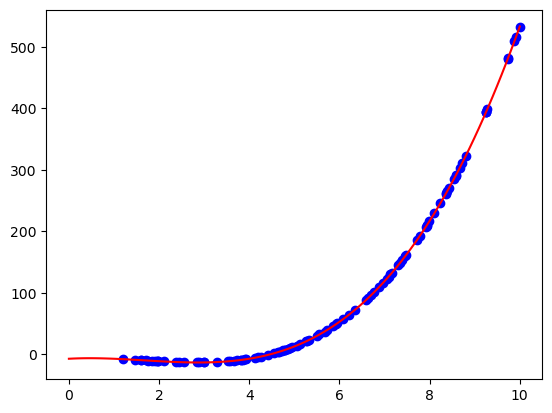

In [4]:
def y_1(x):
    return x**3 - 5*x**2 + 4*x - 7
x_in=np.linspace(0,10,100)
y_in=y_1(x_in)
x,y=gen_data(100,1,10,y_1)
plt.plot(x,y,'o',color='blue')
plt.plot(x_in,y_in, color='red')
plt.show()

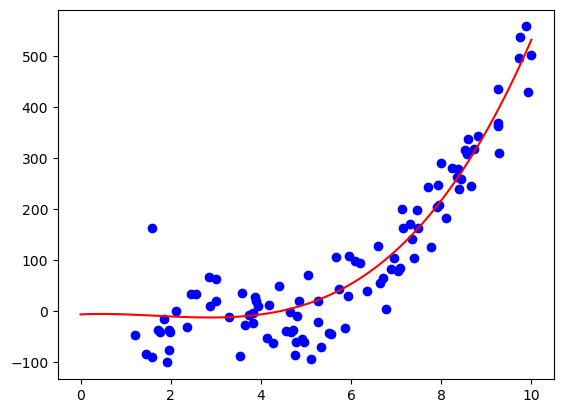

In [5]:
noise=np.random.normal(scale=50,size=100)
y=y+noise
plt.plot(x,y,'o',color='blue')
plt.plot(x_in,y_in, color='red')
plt.show()

In [6]:
df = pd.DataFrame({
    'x': x,
    'y': y})
df

,x,y
0,7.916590,204.219809
1,5.671338,106.729455
2,1.589746,162.365224
3,3.000338,62.125769
4,6.204285,94.454667
...,...,...
95,7.089724,84.115209
96,6.709245,63.765732
97,6.348945,39.946692
98,3.928867,9.879524


In [7]:
train= df.sample(frac=0.8)
test= df.drop(train.index)

In [8]:
model=tf.keras.Sequential([tf.keras.layers.Dense(1,input_shape=(1,))])
model.summary()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1),
    loss=tf.keras.losses.MeanAbsoluteError())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


2024-09-12 20:30:16.281497: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
history=model.fit(train['x'],train['y'],epochs=200,verbose=1,validation_split=0.3)

Epoch 1/200
2/2 [==============================] - 0s 110ms/step - loss: 122.7867 - val_loss: 178.5197
Epoch 2/200
2/2 [==============================] - 0s 20ms/step - loss: 116.6482 - val_loss: 171.7361
Epoch 3/200
2/2 [==============================] - 0s 21ms/step - loss: 112.5418 - val_loss: 165.2380
Epoch 4/200
2/2 [==============================] - 0s 21ms/step - loss: 109.1978 - val_loss: 159.1363
Epoch 5/200
2/2 [==============================] - 0s 23ms/step - loss: 106.3945 - val_loss: 154.0596
Epoch 6/200
2/2 [==============================] - 0s 20ms/step - loss: 103.7507 - val_loss: 149.4184
Epoch 7/200
2/2 [==============================] - 0s 20ms/step - loss: 103.0922 - val_loss: 145.0611
Epoch 8/200
2/2 [==============================] - 0s 21ms/step - loss: 102.0511 - val_loss: 141.2878
Epoch 9/200
2/2 [==============================] - 0s 21ms/step - loss: 101.5993 - val_loss: 138.2551
Epoch 10/200
2/2 [==============================] - 0s 20ms/step - loss: 101.4868

In [10]:
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail()

,loss,val_loss,epoch
195,72.393021,79.827911,195
196,72.482376,79.736076,196
197,72.392860,79.974052,197
198,72.384254,80.324417,198
199,72.406700,80.552368,199


In [11]:
loss=model.evaluate(test['x'],test['y']) 

1/1 [==============================] - 0s 18ms/step - loss: 50.1795


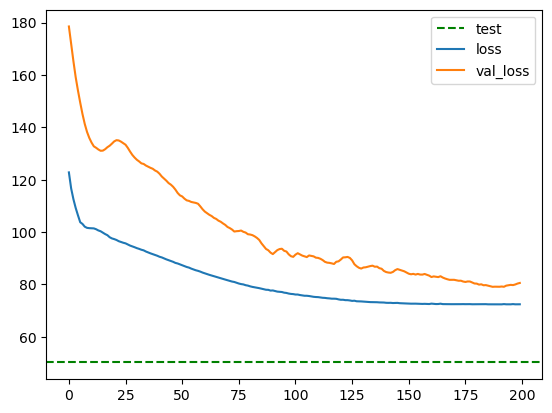

In [12]:
plt.axhline(loss,color='g',linestyle='--',label='test')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 45ms/step


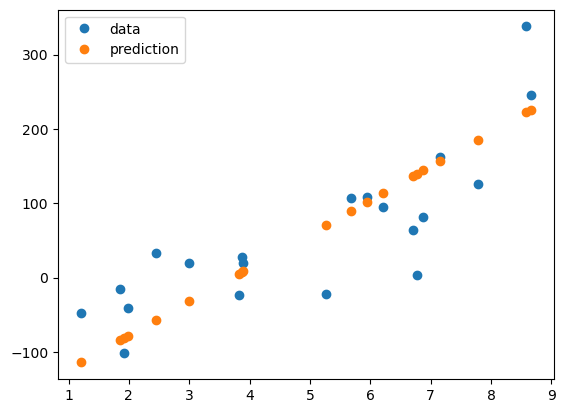

In [13]:
y_predict=model.predict(test['x'])
plt.plot(test['x'],test['y'],'o',label='data')
plt.plot(test['x'],y_predict,'o',label='prediction')
plt.legend()
plt.show()

4/4 [==============================] - 0s 731us/step


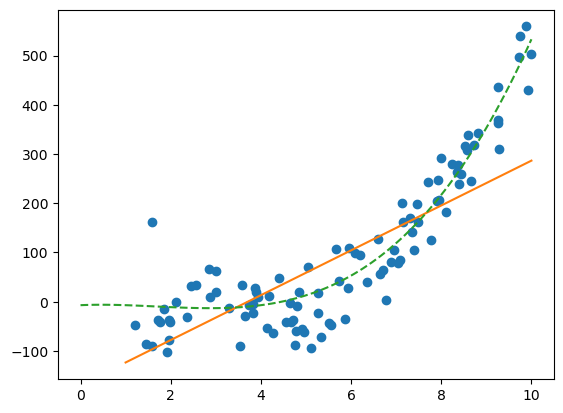

In [14]:
t=np.linspace(1,10,100).reshape(-1,1)
line=model.predict(t)
plt.plot(df['x'],df['y'],'o')
plt.plot(t,line)
plt.plot(x_in,y_in,linestyle='--')
plt.show()

---
### Exercise 2: Overfitting and Underfitting

2.1. Generate a dataset with a quadratic relationship, for instance \(y = x^2 + 2x + 3\). Add Gaussian noise to the output.

2.2. Split the dataset into training and testing sets.

2.3. Train a simple linear model on the dataset and visualize the predictions.

2.4. Now, implement a polynomial regression model of degree 2 and train it on the dataset.

2.5. Compare the performance of the linear model and the polynomial model. Which one underfits? Which one is just right?

2.6. Now, try a polynomial regression of degree 10. What do you observe regarding overfitting?

---

2.6 da sorun yaşadım. model başta oluşturduğum datatyı normalize edip vermediğim sürece çok yüksek hatalar hesplıyor x in yüksek kuvvetlerinden ötürü. Farklı loss functıonları ve learning rateleri denedim hatta L2 regularızatıonu da bu kısımda denedim ama yalnızca normalize edilmiş data verdiğim zaman model düzgün çalışıyor. o yüzden overfit olmasını da sağlayamadım orijinal datayla bunu nasıl sağlayabilirim.   

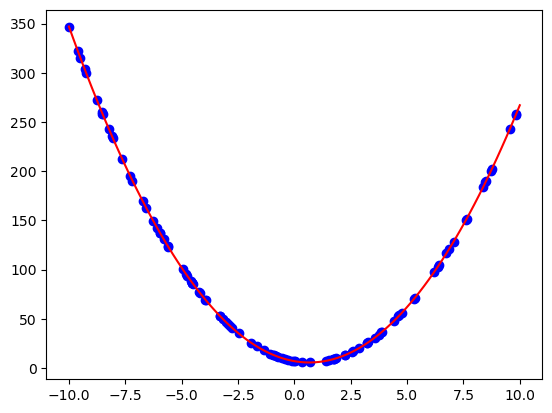

In [15]:
def y_2(x):
    return 3*x**2- 4*x+ 7
x_in2=np.linspace(-10,10,100)
y_in2=y_2(x_in2)
x2,y2=gen_data(100,-10,10,y_2)
plt.plot(x2,y2,'o',color='blue')
plt.plot(x_in2,y_in2, color='red')
plt.show()

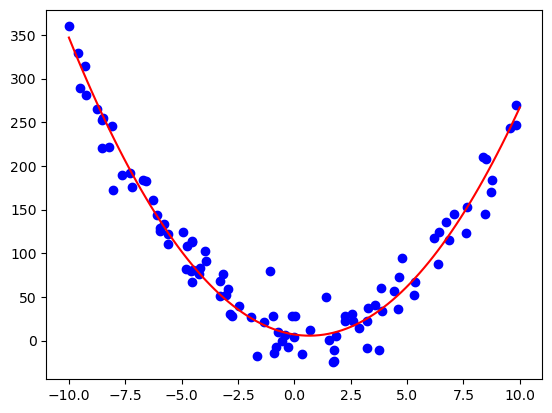

In [16]:
noise=np.random.normal(scale=20,size=100)
y2=y2+noise
plt.plot(x2,y2,'o',color='blue')
plt.plot(x_in2,y_in2, color='red')
plt.show()

In [17]:
df2 = pd.DataFrame({
    'x': x2,
    'y': y2})
df2
train= df2.sample(frac=0.8)
test= df2.drop(train.index)
model2=tf.keras.Sequential([tf.keras.layers.Dense(1,input_shape=(1,))])
model2.summary()
model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1),
    loss=tf.keras.losses.MeanAbsoluteError())
history2=model2.fit(train['x'],train['y'],epochs=200,verbose=0,validation_split=0.3)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


4/4 [==============================] - 0s 865us/step


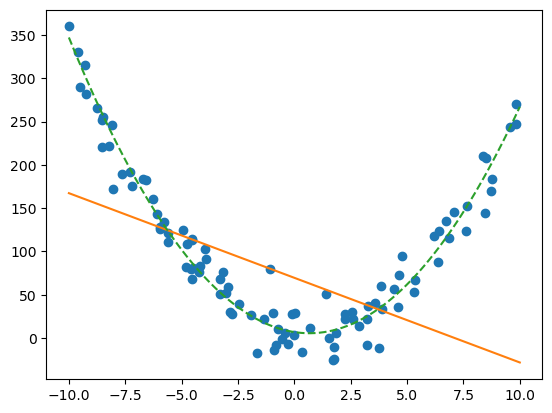

In [18]:
t=np.linspace(-10,10,100).reshape(-1,1)
line=model2.predict(t)
plt.plot(df2['x'],df2['y'],'o')
plt.plot(t,line)
plt.plot(x_in2,y_in2,linestyle='--')
plt.show()

POLYNOMIAL REGRESSION

In [19]:
x_sqr=[i**2 for i in x2]
df2_poly=pd.DataFrame({
    'x1': x2,
    'x2': x_sqr,
    'y' : y2})

In [20]:
train= df2_poly.sample(frac=0.8)
test2= df2_poly.drop(train.index)
model2_poly=tf.keras.Sequential([tf.keras.layers.Dense(1,input_shape=(2,))])
model2_poly.summary()
model2_poly.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.4),
    loss=tf.keras.losses.MeanAbsoluteError())
poly_history=model2_poly.fit(train.drop(columns=['y']),train['y'],epochs=200,validation_split=0.3)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
2/2 [==============================] - 0s 148ms/step - loss: 83.6533 - val_loss: 62.2341
Epoch 2/200
2/2 [==============================] - 0s 19ms/step - loss: 58.3847 - val_loss: 38.6432
Epoch 3/200
2/2 [==============================] - 0s 20ms/step - loss: 34.2788 - val_loss: 20.7399
Epoch 4/200
2/2 [==============================] - 0s 20ms/step - loss: 18.0367 - val_loss: 21.9450
Epoch 5/200
2/2 [==============================] - 0s 20ms/step - loss: 24.3928 - val_loss: 29.8177
Epoch 6/200
2/2 [==============================] - 0s 23ms/step - loss: 30.6141 - val_l

4/4 [==============================] - 0s 850us/step


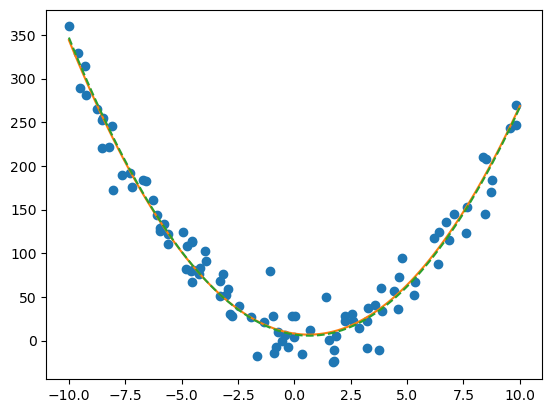

In [21]:
t=[[x,x**2] for x in np.linspace(-10,10,100)]
line=model2_poly.predict(t)
plt.plot(df2_poly['x1'],df2_poly['y'],'o')
plt.plot([i[0] for i in t],line)
plt.plot(x_in2,y_in2,linestyle='--')
plt.show()

In [22]:
loss_linear=model2.evaluate(test['x'],test['y'])
loss_quadratic=model2_poly.evaluate(test2.drop(columns=['y']),test2['y'])


1/1 [==============================] - 0s 17ms/step - loss: 18.6605


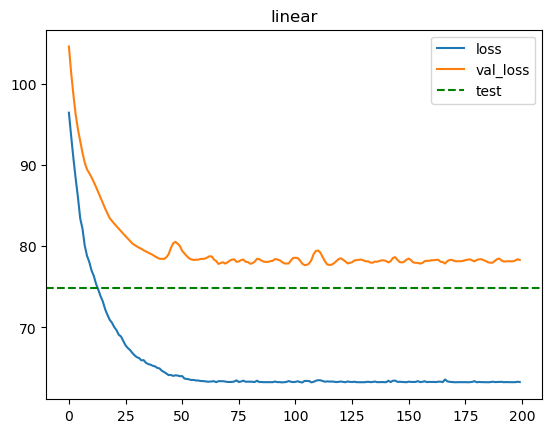

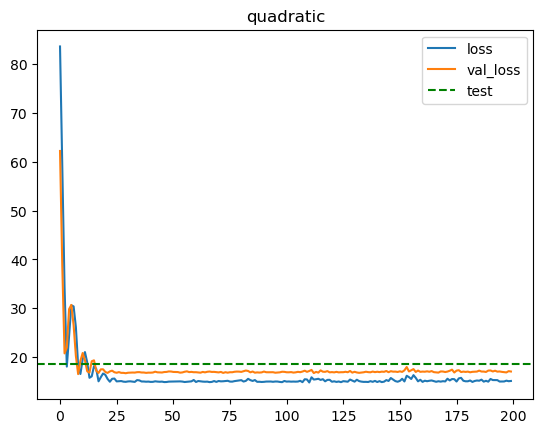

In [23]:
plt.plot(history2.history['loss'],label='loss')
plt.plot(history2.history['val_loss'],label='val_loss')
plt.title('linear')
plt.axhline(loss_linear,color='g',linestyle='--',label='test')
plt.legend()
plt.show()
plt.plot(poly_history.history['loss'],label='loss')
plt.plot(poly_history.history['val_loss'],label='val_loss')
plt.title('quadratic')
plt.axhline(loss_quadratic,color='g',linestyle='--',label='test')
plt.legend()
plt.show()

linear model underfits 

2.6 da yaşadığım sorun burdan itibaren başlıyor.

In [24]:
def poly_datagen(n,x,y=None):
    df=pd.DataFrame({})
    for i in range(1,n+1):
        df[i]=[j**i for j in x]
    df['y']=y    
    return df

In [25]:
n=10
df3=poly_datagen(n,x2,y2)

In [26]:
df3

,1,2,3,4,5,6,7,8,9,10,y
0,-4.796436,23.005801,-110.345856,529.266861,-2.538595e+03,1.217621e+04,-5.840240e+04,2.801234e+05,-1.343594e+06,6.444463e+06,82.377882
1,5.336315,28.476257,151.958279,810.897237,4.327203e+03,2.309132e+04,1.232225e+05,6.575543e+05,3.508917e+06,1.872469e+07,67.022560
2,6.361704,40.471274,257.466249,1637.923982,1.041999e+04,6.628887e+04,4.217101e+05,2.682795e+06,1.706715e+07,1.085761e+08,88.167597
3,-7.178993,51.537942,-369.990530,2656.159459,-1.906855e+04,1.368930e+05,-9.827538e+05,7.055183e+06,-5.064911e+07,3.636096e+08,175.579136
4,-5.966999,35.605082,-212.455505,1267.721874,-7.564496e+03,4.513734e+04,-2.693345e+05,1.607119e+06,-9.589677e+06,5.722160e+07,125.982718
...,...,...,...,...,...,...,...,...,...,...,...
95,0.032354,0.001047,0.000034,0.000001,3.545297e-08,1.147052e-09,3.711194e-11,1.200727e-12,3.884854e-14,1.256913e-15,28.722536
96,4.423315,19.565720,86.545350,382.817384,1.693322e+03,7.490098e+03,3.313106e+04,1.465491e+05,6.482331e+05,2.867340e+06,57.107476
97,9.566171,91.511625,875.415836,8374.377447,8.011073e+04,7.663529e+05,7.331063e+06,7.013020e+07,6.708775e+08,6.417728e+09,243.345337
98,2.237146,5.004823,11.196521,25.048254,5.603661e+01,1.253621e+02,2.804533e+02,6.274150e+02,1.403619e+03,3.140101e+03,22.227328


In [27]:
train= df3.sample(frac=0.8)
test= df3.drop(train.index)

bu modelde aynı 3. kısımda olduğu gibi normalizer vardı o şekilde düzgün sonuç alıyorum ama şuan olduğu haliyle neden çalışmadığını anlamadım.  

In [28]:
model3=tf.keras.Sequential([tf.keras.layers.Dense(1,input_shape=(n,))])
model3.summary()
model3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.4),
    loss=tf.keras.losses.MeanSquaredError())
history3=model3.fit(train.drop(columns=['y']),train['y'],
                    epochs=500,verbose=1,validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
2/2 [==============================] - 0s 103ms/step - loss: 306509001049243648.0000 - val_loss: 10426931832946688.0000
Epoch 2/500
2/2 [==============================] - 0s 21ms/step - loss: 43054435802284032.0000 - val_loss: 86994081544142848.0000
Epoch 3/500
2/2 [==============================] - 0s 21ms/step - loss: 382467318745137152.0000 - val_loss: 31250952992325632.0000
Epoch 4/500
2/2 [==============================] - 0s 21ms/step - loss: 117836293236326400.0000 - val_loss: 14204467238928384.0000
Epoch 5/500
2/2 [==============================] - 0s 20ms/ste

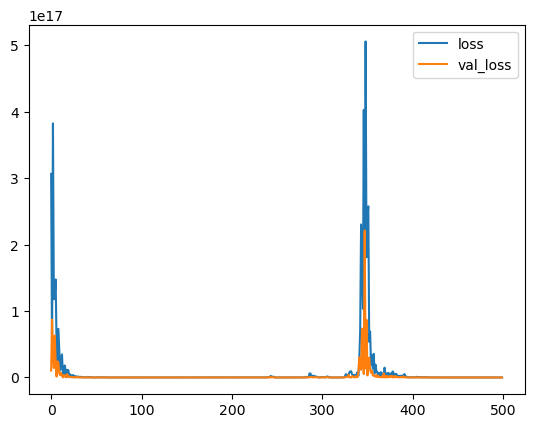

In [29]:
plt.plot(history3.history['loss'],label='loss')
plt.plot(history3.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [30]:
t=[[i**j for j in range(1,11)] for i in np.linspace(-10,10,100)]

4/4 [==============================] - 0s 894us/step


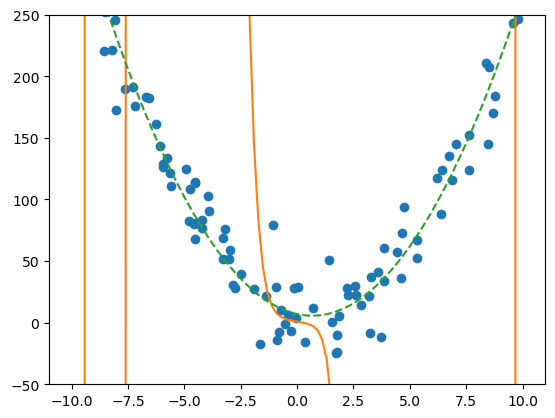

In [31]:
line=model3.predict(t)
plt.plot(df2_poly['x1'],df2_poly['y'],'o')
plt.plot([i[0] for i in t],line)
plt.ylim(-50,250)
plt.plot(x_in2,y_in2,linestyle='--')
plt.show()

loss 2000 epoch sonra dahi buna benzer değğerlerde sabitleniyor daha fazla azaltmak için ne yapmak gerek. 

In [32]:
model3.evaluate(test.drop(columns=['y']),test['y'])

1/1 [==============================] - 0s 19ms/step - loss: 747392794624.0000


747392794624.0

---
### Exercise 3: Regularization

3.1. Continuing from the previous exercise, add L2 regularization to the polynomial regression model of degree 10.

3.2. Train the model and compare its performance with the unregularized degree 10 model. What do you observe?

3.3. Experiment with different regularization strengths. How does the strength of regularization affect the model?

---

In [33]:
train= df3.sample(frac=0.8)
test= df3.drop(train.index)
L2=regularizers.L2
train_features=train.drop(columns=['y'])
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(np.array(train_features))

In [34]:
modelL2=tf.keras.Sequential([tf.keras.layers.InputLayer(input_shape=(n,)),
                            normalizer,tf.keras.layers.Dense(1,
                            kernel_regularizer=L2(1e-2))])
modelL2.summary()
modelL2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.5),
    loss=tf.keras.losses.MeanSquaredError())
history=modelL2.fit(train.drop(columns=['y']),train['y'],epochs=500,verbose=1,validation_split=0.1)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 10)               21        
 n)                                                              
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 32
Trainable params: 11
Non-trainable params: 21
_________________________________________________________________
Epoch 1/500
3/3 [==============================] - 0s 50ms/step - loss: 19750.9023 - val_loss: 5637.3291
Epoch 2/500
3/3 [==============================] - 0s 11ms/step - loss: 18220.8105 - val_loss: 5793.3594
Epoch 3/500
3/3 [==============================] - 0s 11ms/step - loss: 16904.0078 - val_loss: 5968.4341
Epoch 4/500
3/3 [==============================] - 0s 10ms/step - loss: 

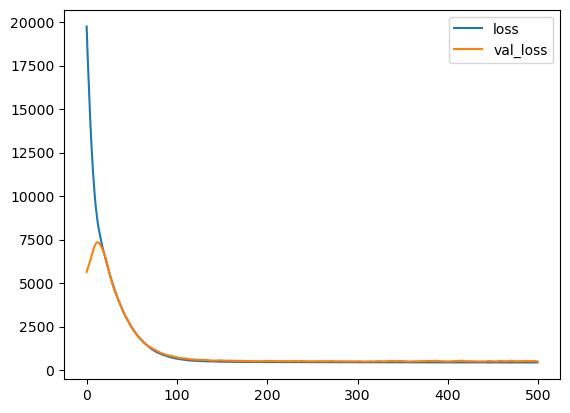

In [35]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [36]:
t=[[i**j for j in range(1,11)] for i in np.linspace(-15,15,100)]

4/4 [==============================] - 0s 1ms/step
[-15.0, 225.0, -3375.0, 50625.0, -759375.0, 11390625.0, -170859375.0, 2562890625.0, -38443359375.0, 576650390625.0]
(100, 1)


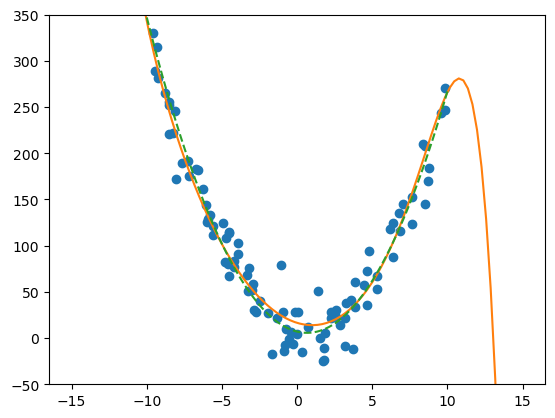

In [37]:

line=modelL2.predict(t)
print(t[0])
print(line.shape)
plt.plot(df2_poly['x1'],df2_poly['y'],'o')
plt.plot([i[0] for i in t],line)
plt.ylim(-50,350)
plt.plot(x_in2,y_in2,linestyle='--')
plt.show()

In [38]:
modelL2.evaluate(test.drop(columns=['y']),test['y'])

1/1 [==============================] - 0s 18ms/step - loss: 754.5891


754.5890502929688

---
### Exercise 4: Activation and Cost Functions

4.1. Define and visualize the following activation functions: Sigmoid, ReLU, and Tanh. Describe their main properties and potential use cases.

4.2. Implement a simple feed-forward neural network in TensorFlow for a binary classification problem. Use the sigmoid activation function for the output layer.

4.3. Generate a toy binary classification dataset and train your neural network on it.

4.4. Replace the sigmoid activation function in the hidden layers with ReLU and compare the performances. Which one trains faster?

4.5. Experiment with different cost functions such as Mean Squared Error (MSE) and Cross-Entropy. What are their differences and which one is more suitable for the given problem?

---

In [149]:
import numpy as np 

In [150]:
inputs=np.linspace(-10,10,100)

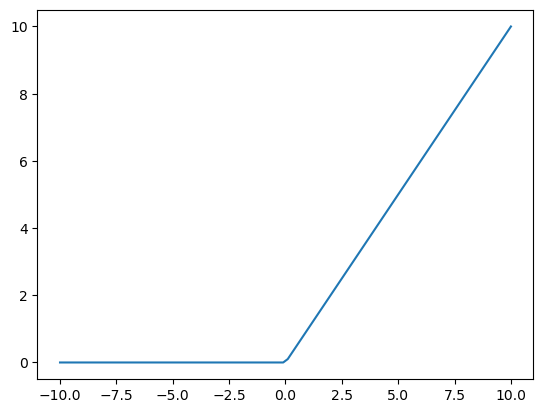

In [151]:
def reLU(x):
    return max(0.0, x)

outputs = [reLU(x) for x in inputs]
plt.plot(inputs, outputs)
plt.show()

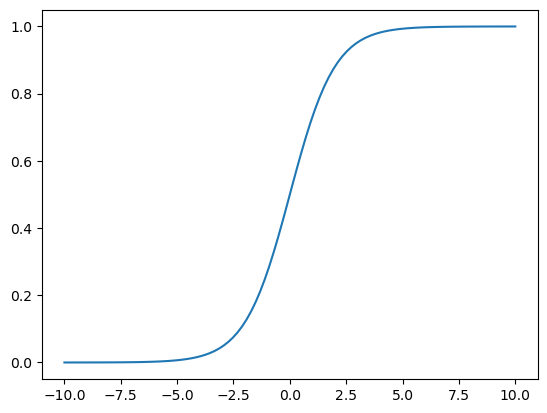

In [152]:
def sigmoid(x):
 return 1.0 / (1.0 + np.exp(-x))

outputs = [sigmoid(x) for x in inputs]
plt.plot(inputs, outputs)
plt.show()

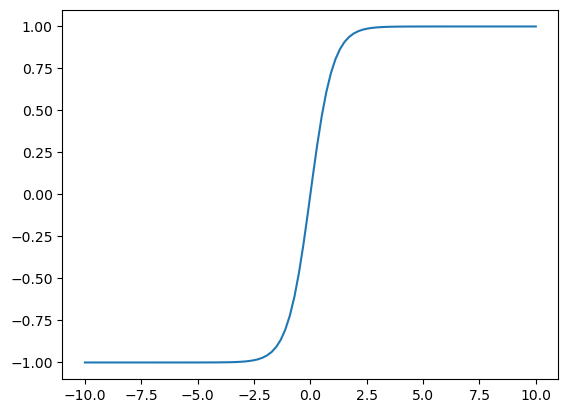

In [153]:
def tanh(x):
 return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
 
outputs = [tanh(x) for x in inputs]
plt.plot(inputs, outputs)
plt.show()

further explanation is in activation_function.ipynb

In [183]:
classification_model=tf.keras.Sequential(
    [tf.keras.layers.Dense(1,input_shape=(2,),activation='sigmoid')])
classification_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy'])

generate toy data with two features x1 and x2 and label y(0 or 1)

In [165]:
X = np.random.uniform(-1, 1, (200,2))
print(X)

[[-0.04764895  0.75036801]
 [ 0.56892945 -0.05985851]
 [ 0.60954166  0.73399435]
 [-0.98546625  0.08253725]
 [-0.43777161 -0.10581517]
 [ 0.65326434 -0.48187818]
 [-0.93826009  0.99305275]
 [ 0.87543795  0.8584447 ]
 [ 0.81801635 -0.8129682 ]
 [ 0.42188031 -0.86055472]
 [ 0.0607042   0.36252386]
 [ 0.09902712  0.6600581 ]
 [ 0.55418089 -0.71770563]
 [ 0.58823636  0.49764879]
 [ 0.53874926 -0.70881632]
 [ 0.1244567  -0.57276552]
 [ 0.3714121   0.74121888]
 [ 0.75123271  0.27461941]
 [ 0.13979198 -0.14555563]
 [ 0.61683157 -0.09962752]
 [-0.30177468 -0.93081659]
 [ 0.55942111  0.00845843]
 [-0.548143    0.59069933]
 [ 0.00411984 -0.06353549]
 [-0.17175013 -0.42255816]
 [-0.84010935  0.27568352]
 [-0.02054907 -0.3667789 ]
 [ 0.5227332   0.0130359 ]
 [ 0.21313362 -0.39131366]
 [ 0.80924487 -0.12046284]
 [ 0.7190352   0.34713525]
 [ 0.56575491 -0.27776397]
 [-0.00246815  0.99768803]
 [-0.81566666  0.51393733]
 [ 0.68578479 -0.50242952]
 [-0.80253035 -0.34517063]
 [ 0.93883783 -0.75024639]
 

In [166]:
def generate_label2D(X):
    point1,point2 = np.random.uniform(-1, 1,(2,2))
    def classify(point):
        x1, y1 = point1
        x2, y2 = point2
        x, y = point
        #check whether the point is in the upside or downside region of target line 
        cross_product = (x2 - x1) * (y - y1) - (y2 - y1) * (x - x1)
        if cross_product > 0:
            return 1
        else:
            return 0
    labels=[]    
    for i in X:
        labels.append(classify(i))
    return labels, (point1,point2)   


In [167]:
L=generate_label2D(X)
Y=L[0]
p1,p2=L[1]

In [168]:
df= pd.DataFrame({
    'x1': X[:,0],
    'x2': X[:,1],
    'label': Y
})

In [169]:
df

,x1,x2,label
0,-0.047649,0.750368,0
1,0.568929,-0.059859,0
2,0.609542,0.733994,0
3,-0.985466,0.082537,0
4,-0.437772,-0.105815,0
...,...,...,...
195,-0.554817,0.666370,0
196,0.727519,0.675434,0
197,-0.491800,0.315179,0
198,0.816659,0.416762,0


visualizing the target function

In [170]:
def get_line(p1,p2):
    m=(p2[1]-p1[1])/(p2[0]-p1[0])
    b=p1[1]-m*p1[0]
    return m,b

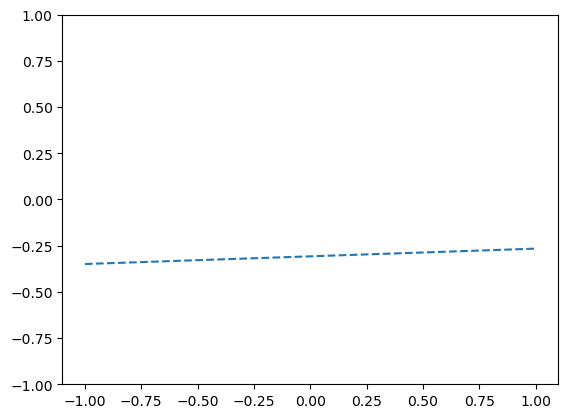

In [171]:
m,b= get_line(p1,p2)
t=np.linspace(-1,1,100)
plt.plot(t,m*t+b,linestyle='--')
plt.ylim(-1,1)
plt.show()

showing the data with target function

In [172]:
def get_map(X,Y,m,b,lable=None):
    for ind,x in enumerate(X):
        if Y[ind]==1:
            color = 'blue'
        else: color = 'red'
        plt.plot(x[0],x[1],'o', color=color) 
    plt.plot(t,m*t+b,label=lable)
    if lable is not None: plt.legend()
    plt.ylim(-1,1)   

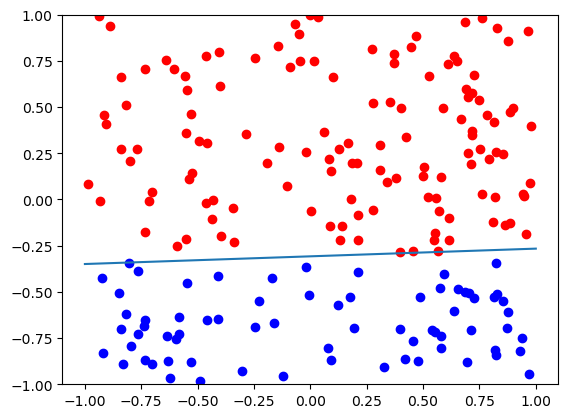

In [173]:
get_map(X,Y,m,b)
plt.show()

In [184]:
history=classification_model.fit(df.drop(columns=['label']),df['label'],epochs=200,verbose=1,
                                 validation_split=0.2)

Epoch 1/200
5/5 [==============================] - 1s 46ms/step - loss: 1.0437 - accuracy: 0.2625 - val_loss: 0.9653 - val_accuracy: 0.2250
Epoch 2/200
5/5 [==============================] - 0s 12ms/step - loss: 0.9910 - accuracy: 0.2750 - val_loss: 0.9150 - val_accuracy: 0.2500
Epoch 3/200
5/5 [==============================] - 0s 13ms/step - loss: 0.9425 - accuracy: 0.2562 - val_loss: 0.8685 - val_accuracy: 0.3500
Epoch 4/200
5/5 [==============================] - 0s 13ms/step - loss: 0.8946 - accuracy: 0.2625 - val_loss: 0.8267 - val_accuracy: 0.4250
Epoch 5/200
5/5 [==============================] - 0s 15ms/step - loss: 0.8533 - accuracy: 0.3313 - val_loss: 0.7883 - val_accuracy: 0.4500
Epoch 6/200
5/5 [==============================] - 0s 14ms/step - loss: 0.8163 - accuracy: 0.3750 - val_loss: 0.7528 - val_accuracy: 0.5750
Epoch 7/200
5/5 [==============================] - 0s 13ms/step - loss: 0.7823 - accuracy: 0.4500 - val_loss: 0.7206 - val_accuracy: 0.6500
Epoch 8/200
5/5 [===

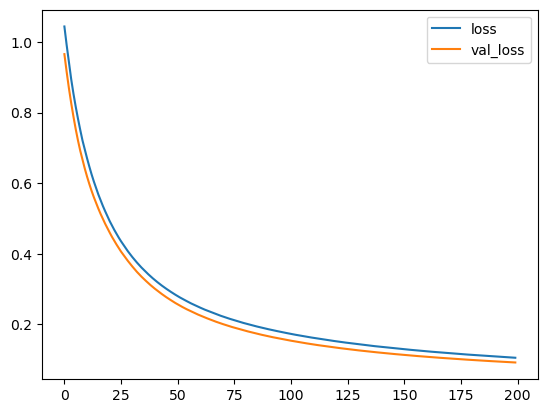

In [185]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [186]:
classification_model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [187]:
classification_model.get_weights()

[array([[-0.2717383],
        [-6.9857016]], dtype=float32),
 array([-2.1960082], dtype=float32)]

In [188]:
coordinates=classification_model.get_weights()[0]
bias=classification_model.get_weights()[1]

x0_1 = np.amin(X[:, 0])
x0_2 = np.amax(X[:, 0])

x1_1 = (-coordinates[0] * x0_1 - bias) / coordinates[1]
x1_2 = (-coordinates[0] * x0_2 - bias) / coordinates[1]

visualization of data, target function and result of the model 

In [189]:
m2,b2=get_line((x0_1,x1_1),(x0_2,x1_2))

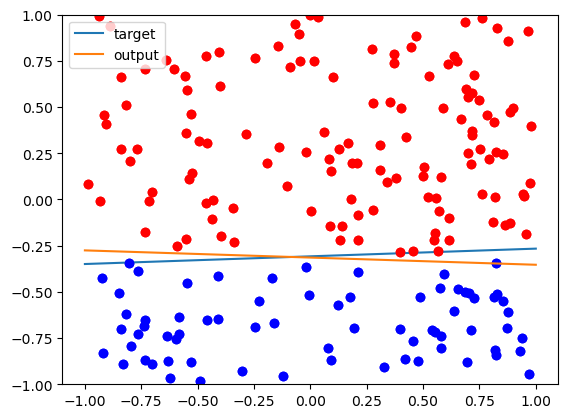

In [190]:
get_map(X,Y,m,b,'target')
get_map(X,Y,m2,b2,'output')
plt.show()

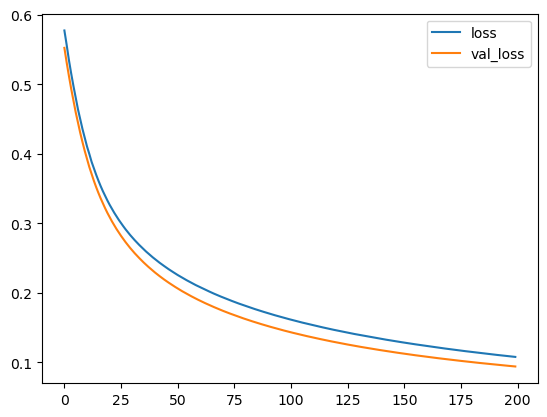

In [181]:
classification_model1=tf.keras.Sequential(
    [tf.keras.layers.Dense(1,input_shape=(2,),activation='sigmoid')])
classification_model1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy'])
history1=classification_model1.fit(df.drop(columns=['label']),df['label'],epochs=200,verbose=0,
                                 validation_split=0.2)
plt.plot(history1.history['loss'],label='loss')
plt.plot(history1.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

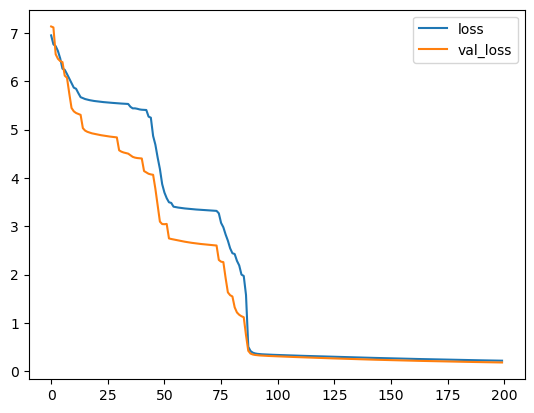

In [182]:
classification_model2=tf.keras.Sequential(
    [tf.keras.layers.Dense(1,input_shape=(2,),activation='relu')])
classification_model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy'])
history2=classification_model2.fit(df.drop(columns=['label']),df['label'],epochs=200,verbose=0,
                                 validation_split=0.2)
plt.plot(history2.history['loss'],label='loss')
plt.plot(history2.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

relu seems to be converging around 85 epochs while sigmoid drops more smoothly to its minimum around 200 epochs with given learning rate(0.01). Although converging faster, high value of initial loss likely to result in more un-even rate of learning in relu loss function. 

bigger data without visualization

In [191]:
features=10
size=10000
def data_gen(features,size):
    x=np.random.uniform(-1,1,(size,features))
    label=[int(j.sum()>0) for j in x]
    df=pd.DataFrame({})
    for i in range(features):
        df[f'x{i+1}']=x[:,i]
    df['label']=label
    return df
    

label is 1 if sum of all features >0 and 0 otherwise

In [192]:
df=data_gen(features,size)

In [193]:
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,label
0,0.353404,0.507236,-0.002520,0.647039,0.590267,-0.465907,0.885817,0.506364,0.941894,0.787117,1
1,0.128641,-0.811726,0.602770,-0.842451,0.389854,0.746167,-0.779492,0.931692,0.965504,-0.454276,1
2,-0.585606,-0.485999,0.108412,0.026722,-0.306359,-0.808379,0.500632,0.094110,0.024018,-0.401638,0
3,-0.006089,0.139674,-0.933847,-0.873034,0.789211,-0.890292,0.767141,0.607441,0.464568,-0.993873,0
4,-0.671208,0.074392,-0.041543,-0.922945,0.686001,0.566543,-0.953608,-0.094238,-0.284527,0.615776,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.501138,0.940043,0.695435,-0.558974,0.258545,-0.822066,-0.438935,0.093571,0.932248,0.519944,1
9996,0.639882,-0.258162,-0.450675,-0.596598,-0.299750,-0.503625,-0.024905,0.634463,0.118029,-0.027506,0
9997,0.558314,0.763063,0.122159,0.260989,0.169822,-0.068374,0.003075,-0.809113,-0.827054,0.587598,1
9998,0.876864,-0.774800,-0.403509,-0.116048,-0.049255,0.253696,-0.555941,-0.401438,-0.789492,-0.679314,0


In [194]:
bigmodel=tf.keras.Sequential([
    tf.keras.layers.Dense(128,input_shape=(10,),activation='sigmoid'),
    tf.keras.layers.Dense(16,activation='sigmoid'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

bigmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [195]:
history=bigmodel.fit(df.drop(columns='label'),df['label'],epochs=50,verbose=1,validation_split=0.1)

Epoch 1/50
282/282 [==============================] - 2s 5ms/step - loss: 0.5307 - accuracy: 0.8316 - val_loss: 0.2741 - val_accuracy: 0.9770
Epoch 2/50
282/282 [==============================] - 1s 5ms/step - loss: 0.1743 - accuracy: 0.9868 - val_loss: 0.1069 - val_accuracy: 0.9860
Epoch 3/50
282/282 [==============================] - 2s 5ms/step - loss: 0.0917 - accuracy: 0.9904 - val_loss: 0.0686 - val_accuracy: 0.9890
Epoch 4/50
282/282 [==============================] - 2s 6ms/step - loss: 0.0640 - accuracy: 0.9924 - val_loss: 0.0494 - val_accuracy: 0.9940
Epoch 5/50
282/282 [==============================] - 1s 4ms/step - loss: 0.0502 - accuracy: 0.9936 - val_loss: 0.0408 - val_accuracy: 0.9940
Epoch 6/50
282/282 [==============================] - 1s 4ms/step - loss: 0.0421 - accuracy: 0.9924 - val_loss: 0.0334 - val_accuracy: 0.9950
Epoch 7/50
282/282 [==============================] - 1s 3ms/step - loss: 0.0364 - accuracy: 0.9946 - val_loss: 0.0289 - val_accuracy: 0.9970
Epoch 

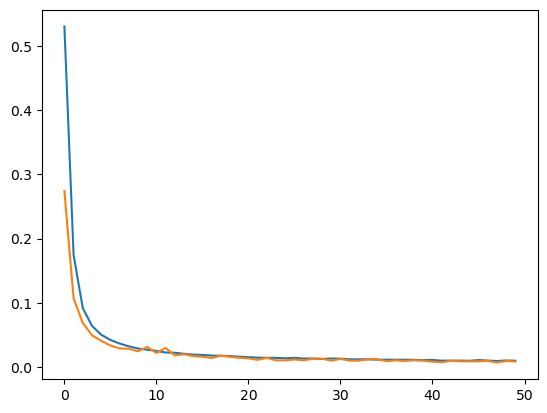

In [197]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [198]:
bigmodel2=tf.keras.Sequential([
    tf.keras.layers.Dense(128,input_shape=(10,),activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

bigmodel2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [199]:
history2=bigmodel2.fit(df.drop(columns='label'),df['label'],epochs=50,verbose=1,validation_split=0.1)

Epoch 1/50
282/282 [==============================] - 3s 7ms/step - loss: 0.2097 - accuracy: 0.9513 - val_loss: 0.0545 - val_accuracy: 0.9940
Epoch 2/50
282/282 [==============================] - 2s 5ms/step - loss: 0.0471 - accuracy: 0.9881 - val_loss: 0.0337 - val_accuracy: 0.9900
Epoch 3/50
282/282 [==============================] - 2s 5ms/step - loss: 0.0339 - accuracy: 0.9898 - val_loss: 0.0318 - val_accuracy: 0.9850
Epoch 4/50
282/282 [==============================] - 1s 5ms/step - loss: 0.0255 - accuracy: 0.9929 - val_loss: 0.0253 - val_accuracy: 0.9890
Epoch 5/50
282/282 [==============================] - 1s 3ms/step - loss: 0.0215 - accuracy: 0.9942 - val_loss: 0.0251 - val_accuracy: 0.9860
Epoch 6/50
282/282 [==============================] - 1s 2ms/step - loss: 0.0184 - accuracy: 0.9953 - val_loss: 0.0251 - val_accuracy: 0.9860
Epoch 7/50
282/282 [==============================] - 1s 2ms/step - loss: 0.0164 - accuracy: 0.9953 - val_loss: 0.0226 - val_accuracy: 0.9880
Epoch 

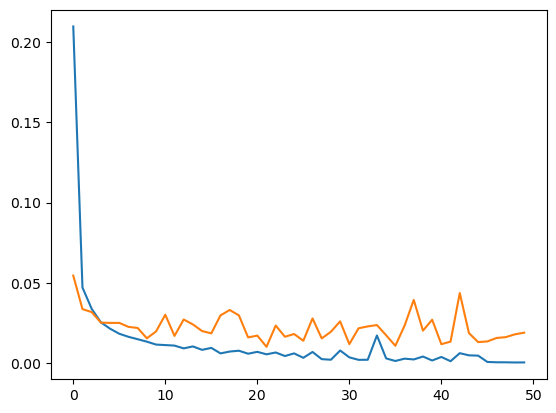

In [200]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.show()

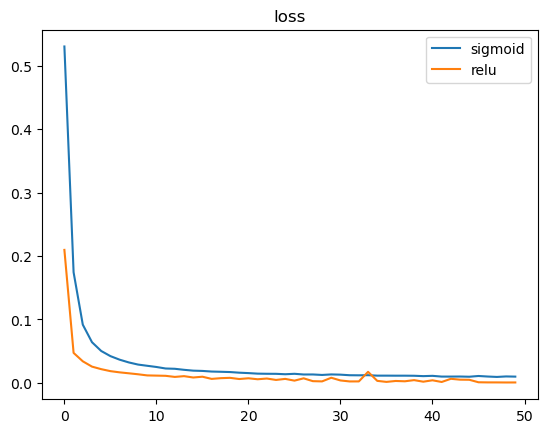

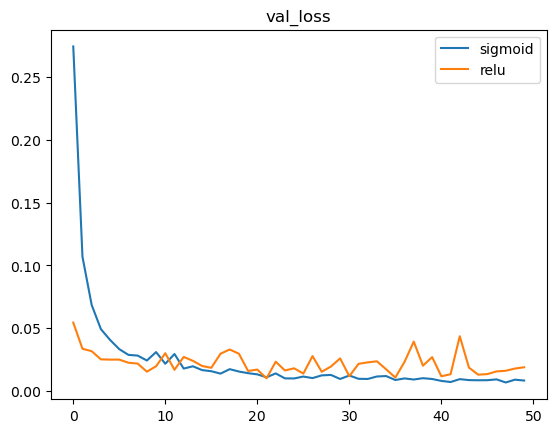

In [201]:
plt.plot(history.history['loss'],label='sigmoid')
plt.plot(history2.history['loss'],label='relu')
plt.title('loss')
plt.legend()
plt.show()
plt.plot(history.history['val_loss'],label='sigmoid')
plt.plot(history2.history['val_loss'],label='relu')
plt.title('val_loss')
plt.legend()
plt.show()

Model seems to be training about 7 seconds faster with relu activation compaired to sigmoid. It's initial error seems to be smaller in the training and validation loss and reduces faster in training. Although, validation loss of sigmoid function reaches to values that of relu function around 10 epochs and perform better while relu loss fluctuates between some higher values.    

In [202]:
bigmodel_MAE=tf.keras.Sequential([
    tf.keras.layers.Dense(128,input_shape=(10,),activation='sigmoid'),
    tf.keras.layers.Dense(16,activation='sigmoid'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

bigmodel_MAE.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=['accuracy'])

In [203]:
history_MAE=bigmodel_MAE.fit(df.drop(columns='label'),df['label'],epochs=50,verbose=1,validation_split=0.1)

Epoch 1/50
282/282 [==============================] - 3s 6ms/step - loss: 0.3750 - accuracy: 0.7170 - val_loss: 0.1866 - val_accuracy: 0.9630
Epoch 2/50
282/282 [==============================] - 1s 4ms/step - loss: 0.1185 - accuracy: 0.9833 - val_loss: 0.0721 - val_accuracy: 0.9960
Epoch 3/50
282/282 [==============================] - 1s 5ms/step - loss: 0.0625 - accuracy: 0.9917 - val_loss: 0.0465 - val_accuracy: 0.9870
Epoch 4/50
282/282 [==============================] - 1s 4ms/step - loss: 0.0443 - accuracy: 0.9918 - val_loss: 0.0340 - val_accuracy: 0.9950
Epoch 5/50
282/282 [==============================] - 1s 4ms/step - loss: 0.0348 - accuracy: 0.9938 - val_loss: 0.0289 - val_accuracy: 0.9910
Epoch 6/50
282/282 [==============================] - 1s 3ms/step - loss: 0.0293 - accuracy: 0.9931 - val_loss: 0.0244 - val_accuracy: 0.9940
Epoch 7/50
282/282 [==============================] - 1s 4ms/step - loss: 0.0255 - accuracy: 0.9931 - val_loss: 0.0205 - val_accuracy: 0.9950
Epoch 

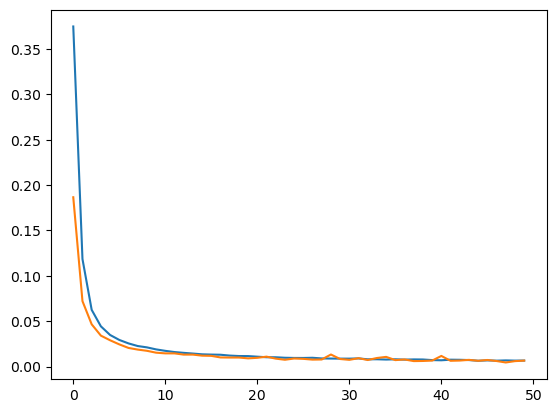

In [204]:
plt.plot(history_MAE.history['loss'])
plt.plot(history_MAE.history['val_loss'])
plt.show()

In [205]:
bigmodel_MSE=tf.keras.Sequential([
    tf.keras.layers.Dense(128,input_shape=(10,),activation='sigmoid'),
    tf.keras.layers.Dense(16,activation='sigmoid'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

bigmodel_MSE.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

In [206]:
history_MSE=bigmodel_MSE.fit(df.drop(columns='label'),df['label'],epochs=50,verbose=1,validation_split=0.1)

Epoch 1/50
282/282 [==============================] - 2s 5ms/step - loss: 0.1758 - accuracy: 0.8504 - val_loss: 0.0759 - val_accuracy: 0.9750
Epoch 2/50
282/282 [==============================] - 1s 4ms/step - loss: 0.0485 - accuracy: 0.9888 - val_loss: 0.0302 - val_accuracy: 0.9900
Epoch 3/50
282/282 [==============================] - 1s 3ms/step - loss: 0.0268 - accuracy: 0.9900 - val_loss: 0.0192 - val_accuracy: 0.9970
Epoch 4/50
282/282 [==============================] - 1s 4ms/step - loss: 0.0195 - accuracy: 0.9939 - val_loss: 0.0149 - val_accuracy: 0.9950
Epoch 5/50
282/282 [==============================] - 1s 4ms/step - loss: 0.0157 - accuracy: 0.9939 - val_loss: 0.0137 - val_accuracy: 0.9900
Epoch 6/50
282/282 [==============================] - 1s 4ms/step - loss: 0.0138 - accuracy: 0.9917 - val_loss: 0.0113 - val_accuracy: 0.9910
Epoch 7/50
282/282 [==============================] - 1s 5ms/step - loss: 0.0117 - accuracy: 0.9929 - val_loss: 0.0101 - val_accuracy: 0.9920
Epoch 

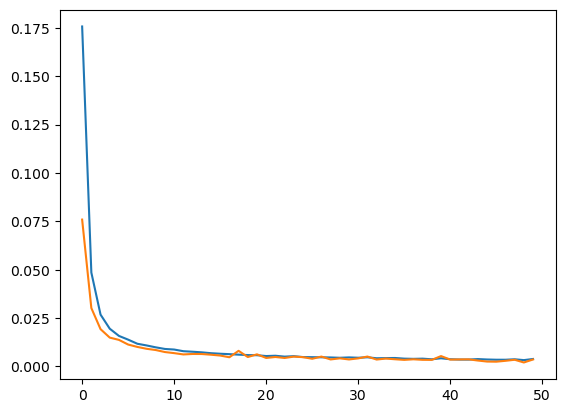

In [207]:
plt.plot(history_MSE.history['loss'])
plt.plot(history_MSE.history['val_loss'])
plt.show()

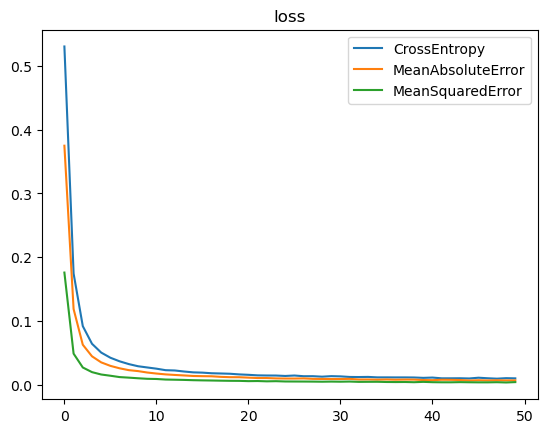

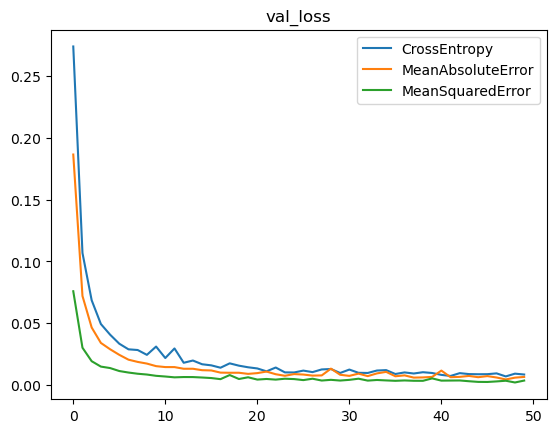

In [208]:
plt.plot(history.history['loss'],label='CrossEntropy')
plt.plot(history_MAE.history['loss'],label='MeanAbsoluteError')
plt.plot(history_MSE.history['loss'],label='MeanSquaredError')
plt.title('loss')
plt.legend()
plt.show()
plt.plot(history.history['val_loss'],label='CrossEntropy')
plt.plot(history_MAE.history['val_loss'],label='MeanAbsoluteError')
plt.plot(history_MSE.history['val_loss'],label='MeanSquaredError')
plt.title('val_loss')
plt.legend()
plt.show()

MeanSquaredError seems to be giving better error meajurements in training loss. and it is also the most stable out of three in terms of validation loss. though it might be a result of my poor choice of validation split.   

In [210]:
#burada modelleri tekrar tanımlamadan sıfırlamanın ve tekrar eğitmenin bir yolu var mı?
bigmodel=tf.keras.Sequential([
    tf.keras.layers.Dense(128,input_shape=(10,),activation='sigmoid'),
    tf.keras.layers.Dense(16,activation='sigmoid'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
bigmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])


bigmodel_MSE=tf.keras.Sequential([
    tf.keras.layers.Dense(128,input_shape=(10,),activation='sigmoid'),
    tf.keras.layers.Dense(16,activation='sigmoid'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
bigmodel_MSE.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])


bigmodel_MAE=tf.keras.Sequential([
    tf.keras.layers.Dense(128,input_shape=(10,),activation='sigmoid'),
    tf.keras.layers.Dense(16,activation='sigmoid'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
bigmodel_MAE.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=['accuracy'])

In [211]:
history=bigmodel.fit(df.drop(columns='label'),df['label'],epochs=50,verbose=0,validation_split=0.3)
history_MSE=bigmodel_MSE.fit(df.drop(columns='label'),df['label'],epochs=50,verbose=0,validation_split=0.3)
history_MAE=bigmodel_MAE.fit(df.drop(columns='label'),df['label'],epochs=50,verbose=0,validation_split=0.3)

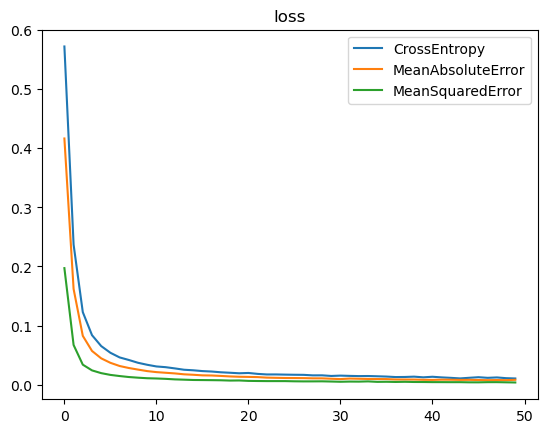

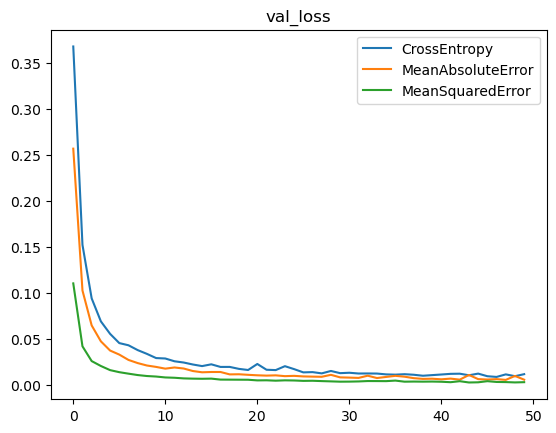

In [212]:
plt.plot(history.history['loss'],label='CrossEntropy')
plt.plot(history_MAE.history['loss'],label='MeanAbsoluteError')
plt.plot(history_MSE.history['loss'],label='MeanSquaredError')
plt.title('loss')
plt.legend()
plt.show()
plt.plot(history.history['val_loss'],label='CrossEntropy')
plt.plot(history_MAE.history['val_loss'],label='MeanAbsoluteError')
plt.plot(history_MSE.history['val_loss'],label='MeanSquaredError')
plt.title('val_loss')
plt.legend()
plt.show()

cross  entropinin daha iyi performans göstermesi gerekmez mi?
